In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%run twisted_graphene.py

In [38]:
def graphene_bilayer(p,q,hop_range,hop_ratio,V):
    g=TwistedBilayerGraphene(p,q)
    g.calc_hops(hop_range)
    g.set_kpath(g.path_GMKG,[100,80,100])
    g.set_hamiltonian(hop_ratio*2.8922/0.3155,V)
    g.calc_bands_and_layer_characters(4,0.0)
    return g

In [39]:
def plot_bands_with_cmap(bands,ell,weights,cmap):
    vmin=np.min(weights)
    vmax=np.max(weights)
    for i in range(bands.shape[1]):
        plt.scatter(ell,bands[:,i],c=weights[:,i],cmap=cmap,marker='.',vmin=vmin,vmax=vmax,s=0.2)

In [40]:
from ipywidgets import interact

In [41]:
@interact(p=(0,1,1),q=(0,1,1),n_inter=(0,9,1),hop_ratio=(0.01,1.0,0.01),V_ratio=(0,10,0.01))
def plot(p=1,q=0,n_inter=1,hop_ratio=0.11,V_ratio=0.0):
    hop_range=np.sqrt(distances_intra[n_inter-1]**2+3.35**2) if n_inter>0 else 1.43
    g=graphene_bilayer(p,q,hop_range,hop_ratio,V_ratio*2.8922)
    
    plot_bands_with_cmap(g.bands/2.8922,g.ell,g.layer2_character,'rainbow')
    
    cbar=plt.colorbar(cm.ScalarMappable(matplotlib.colors.Normalize(vmin=0,vmax=1),cmap='rainbow'))
    cbar.set_ticks([0,0.5,1.0],labels=['layer 1','','layer 2'],rotation=270,)
    
    plt.grid(True,alpha=0.4)
    plt.xlim((g.ell[0],g.ell[-1]))
    plt.xticks(g.ell[g.kticks],['$\mathbf{\Gamma}$','$\mathbf{M}$','$\mathbf{K}$','$\mathbf{\Gamma}$'])
    plt.ylim((-5,5))
    plt.ylabel('$\\varepsilon(\mathbf{k})/t_1$')
    plt.title(f'$\\theta = {g.theta*180/np.pi:.2f}^\circ$, $n_{{inter}}={n_inter}$, $t_{{\\perp}}/t_1={hop_ratio:.2f}$, $V/t_1={V_ratio:.2f}$')

    plt.show()

interactive(children=(IntSlider(value=1, description='p', max=1), IntSlider(value=0, description='q', max=1), …

In [17]:
@interact(p=(1,10,1),q=(1,10,1),d_inter=(0.01,9.0,0.01),hop_ratio=(0.01,1.0,0.01),V=(0,5,0.1))
def plot(p=1,q=1,d_inter=1.43,hop_ratio=0.11,V=0.0):
    g=graphene_bilayer(p,q,d_inter,hop_ratio,V)
    
    plot_bands_with_cmap(g.bands/2.8922,g.ell,g.layer2_character,'rainbow')
    
    cbar=plt.colorbar()
    cbar.set_ticks([0,0.5,1.0],labels=['layer 1','','layer 2'],rotation=270,)
    
    plt.grid(True,alpha=0.4)
    plt.xlim((g.ell[0],g.ell[-1]))
    plt.xticks(g.ell[g.kticks],['$\mathbf{\Gamma}$','$\mathbf{M}$','$\mathbf{K}$','$\mathbf{\Gamma}$'])
    plt.ylim((-1.5,1.5))
    plt.ylabel('$\\varepsilon(\mathbf{k})/t_1$')
    plt.title(f'$\\theta = {g.theta*180/np.pi:.2f}^\circ$, $d_{{inter}}={d_inter:.2f}$ Å, $t_{{\\perp}}/t_1={hop_ratio:.2f}$, $V/t_1={V/2.8922:.2f}$')

    plt.show()

interactive(children=(IntSlider(value=1, description='p', max=10, min=1), IntSlider(value=1, description='q', …

In [19]:
def graphene_bilayer(p,q,hop_range,hop_ratio,V_ratio):
    g=TwistedBilayerGraphene(p,q)
    g.calc_hops(hop_range)
    g.set_kpath(g.path_GMKG,[100,80,100])
    g.set_hamiltonian(hop_ratio*2.8922/0.3155,V_ratio*2.8922)
    g.calc_bands_and_layer_characters(4,0.0)
    return g

In [20]:
def plot_bands_with_cmap(bands,ell,weights,cmap,ax):
    vmin=np.min(weights)
    vmax=np.max(weights)
    for i in range(bands.shape[1]):
        ax.scatter(ell,bands[:,i],c=weights[:,i],cmap=cmap,marker='.',vmin=vmin,vmax=vmax,s=0.2)

In [10]:
from matplotlib import cm

In [11]:
import matplotlib

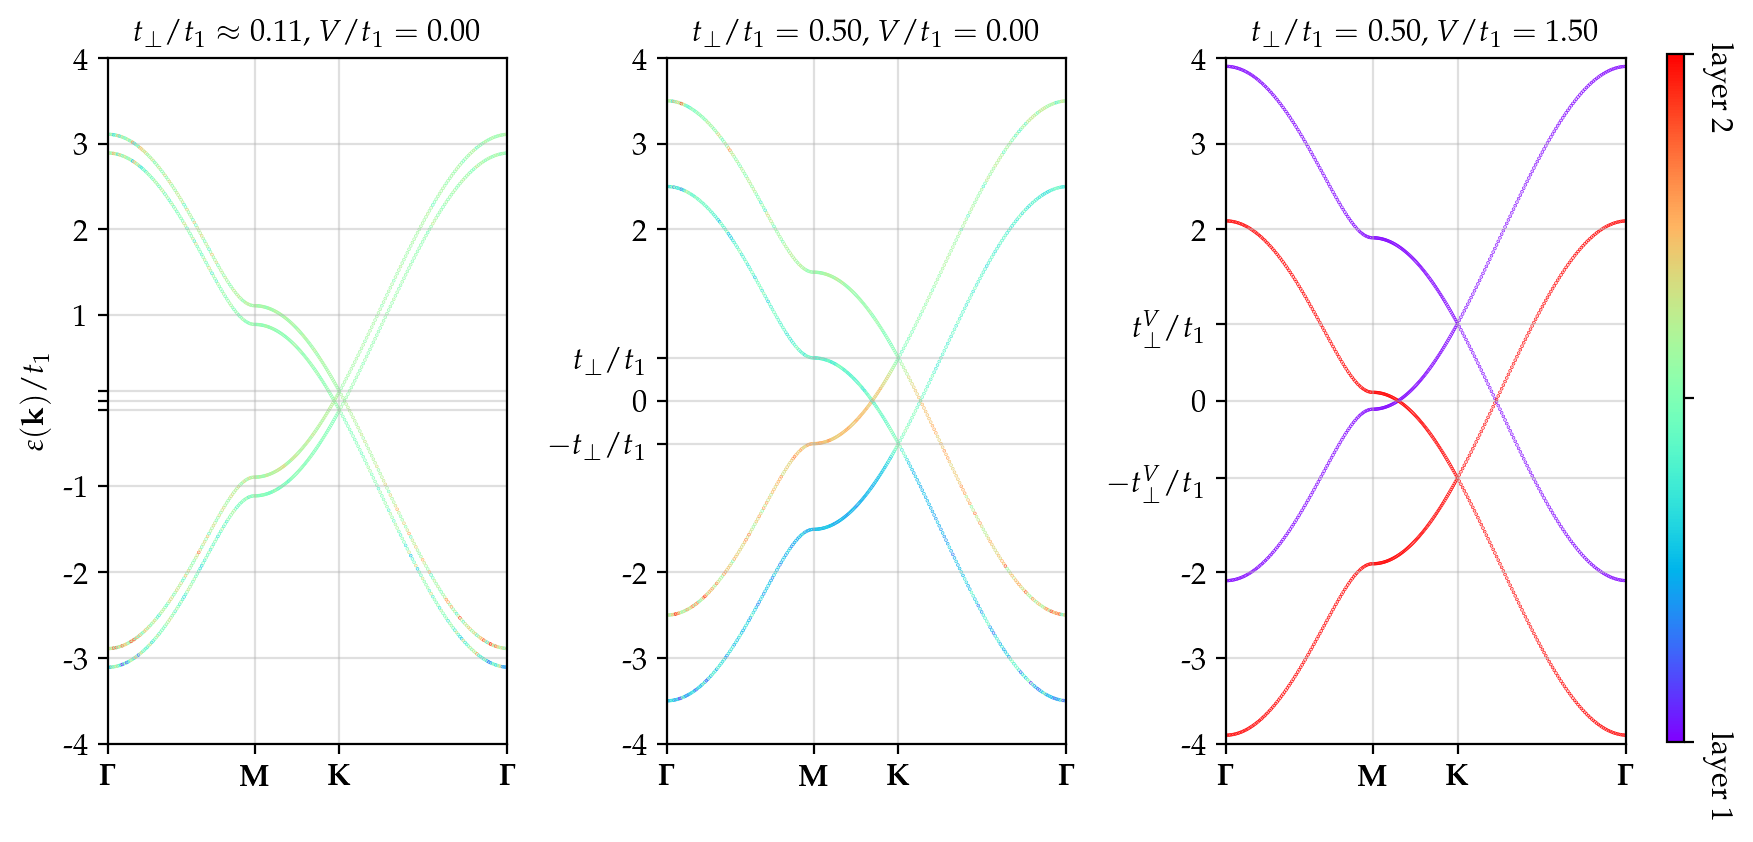

In [12]:
height=4.20
ratio=2.0


gridspec = {'width_ratios': [1, 1, 1, 0.08]}
fig, axes = plt.subplots(1, 3, figsize=(ratio*height,height))#, gridspec_kw=gridspec)
# plt.subplots_adjust(hspace=0.05,wspace=0.05)

hop_ratio=0.3155/2.8922
V_ratio=0.0
g=graphene_bilayer(1,0,3.36,hop_ratio,V_ratio)

ax=axes[0]
plot_bands_with_cmap(g.bands/2.8922,g.ell,g.layer2_character,'rainbow',ax)

ax.grid(True,alpha=0.4)
ax.set_xlim((g.ell[0],g.ell[-1]))
ax.set_xticks(g.ell[g.kticks],['$\mathbf{\Gamma}$','$\mathbf{M}$','$\mathbf{K}$','$\mathbf{\Gamma}$'])
ax.set_ylim((-4,4))
ax.set_ylabel('$\\varepsilon(\mathbf{k})/t_1$')
ax.set_title(f'$t_{{\\perp}}/t_1\\approx{hop_ratio:.2f}$, $V/t_1={V_ratio:.2f}$')
ax.set_yticks([-4,-3,-2,-1,-hop_ratio,0,hop_ratio,1,2,3,4],['-4','-3','-2','-1','','','','1','2','3','4'])

hop_ratio=0.5
V=0.0
g=graphene_bilayer(1,0,3.36,hop_ratio,V)

ax=axes[1]
plot_bands_with_cmap(g.bands/2.8922,g.ell,g.layer2_character,'rainbow',ax)

ax.grid(True,alpha=0.4)
ax.set_xlim((g.ell[0],g.ell[-1]))
ax.set_xticks(g.ell[g.kticks],['$\mathbf{\Gamma}$','$\mathbf{M}$','$\mathbf{K}$','$\mathbf{\Gamma}$'])
ax.set_ylim((-4,4))
# ax.set_ylabel('$\\varepsilon(\mathbf{k})/t_1$')
ax.set_title(f'$t_{{\\perp}}/t_1={hop_ratio:.2f}$, $V/t_1={V_ratio:.2f}$')
ax.set_yticks([-4,-3,-2,-hop_ratio,0,hop_ratio,2,3,4],['-4','-3','-2','$-t_{\\perp}/t_1$','0','$t_{\\perp}/t_1$','2','3','4'])


hop_ratio=0.5
V_ratio=1.5
g=graphene_bilayer(1,0,3.36,hop_ratio,V_ratio)

ax=axes[2]
plot_bands_with_cmap(g.bands/2.8922,g.ell,g.layer2_character,'rainbow',ax)


ax.grid(True,alpha=0.4)
ax.set_xlim((g.ell[0],g.ell[-1]))
ax.set_xticks(g.ell[g.kticks],['$\mathbf{\Gamma}$','$\mathbf{M}$','$\mathbf{K}$','$\mathbf{\Gamma}$'])
ax.set_ylim((-4,4))
# ax.set_ylabel('$\\varepsilon(\mathbf{k})/t_1$')
ax.set_title(f'$t_{{\\perp}}/t_1={hop_ratio:.2f}$, $V/t_1={V_ratio:.2f}$')
tp_V=np.sqrt(hop_ratio**2+(V_ratio/2)**2)
ax.set_yticks([-4,-3,-2,-tp_V,0,tp_V,2,3,4],['-4','-3','-2','$-t_{\\perp}^V/t_1$','0','$t_{\\perp}^V/t_1$','2','3','4'])

cbaxes = fig.add_axes([1, 0.1, 0.01, 0.82]) 
cbar=fig.colorbar(cm.ScalarMappable(matplotlib.colors.Normalize(vmin=0,vmax=1),cmap='rainbow'),ax=axes,cax=cbaxes)
cbar.set_ticks([0,0.5,1.0],labels=['layer 1','','layer 2'],rotation=270)
    
plt.savefig('Fig23_intercoup_and_V_study_AA.svg',bbox_inches='tight')
plt.savefig('Fig23_intercoup_and_V_study_AA.png',dpi=300,bbox_inches='tight')

plt.show()

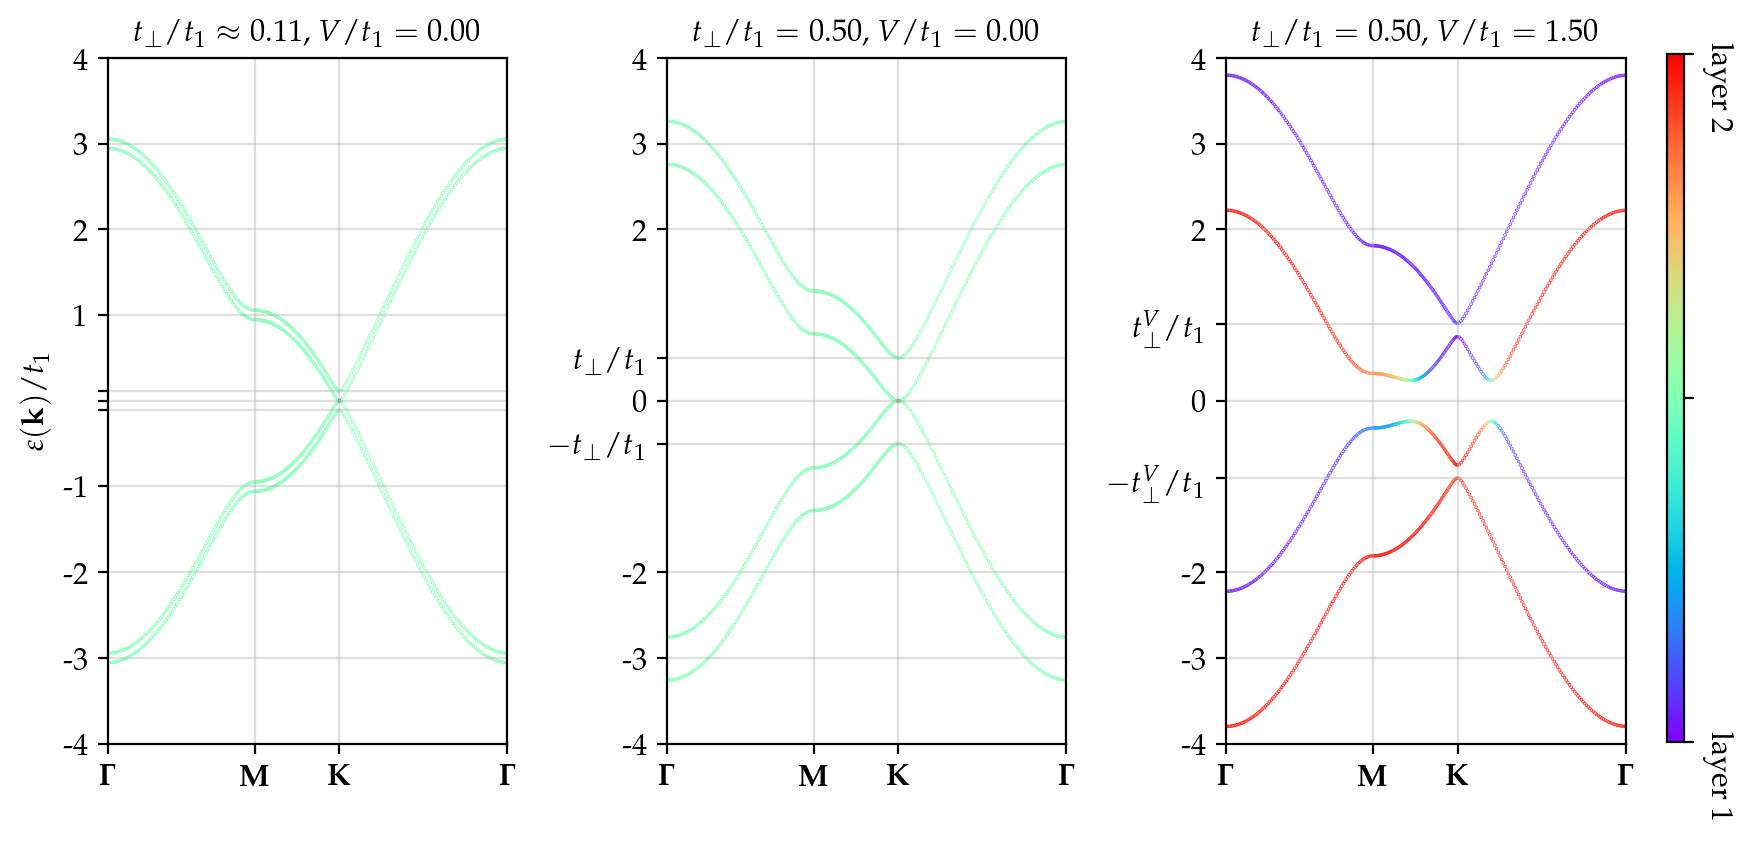

In [13]:
height=4.20
ratio=2.0


gridspec = {'width_ratios': [1, 1, 1, 0.08]}
fig, axes = plt.subplots(1, 3, figsize=(ratio*height,height))#, gridspec_kw=gridspec)
# plt.subplots_adjust(hspace=0.05,wspace=0.05)

hop_ratio=0.3155/2.8922
V_ratio=0.0
g=graphene_bilayer(0,1,3.36,hop_ratio,V_ratio)

ax=axes[0]
plot_bands_with_cmap(g.bands/2.8922,g.ell,g.layer2_character,'rainbow',ax)

ax.grid(True,alpha=0.4)
ax.set_xlim((g.ell[0],g.ell[-1]))
ax.set_xticks(g.ell[g.kticks],['$\mathbf{\Gamma}$','$\mathbf{M}$','$\mathbf{K}$','$\mathbf{\Gamma}$'])
ax.set_ylim((-4,4))
ax.set_ylabel('$\\varepsilon(\mathbf{k})/t_1$')
ax.set_title(f'$t_{{\\perp}}/t_1\\approx{hop_ratio:.2f}$, $V/t_1={V_ratio:.2f}$')
ax.set_yticks([-4,-3,-2,-1,-hop_ratio,0,hop_ratio,1,2,3,4],['-4','-3','-2','-1','','','','1','2','3','4'])

hop_ratio=0.5
V=0.0
g=graphene_bilayer(0,1,3.36,hop_ratio,V)

ax=axes[1]
plot_bands_with_cmap(g.bands/2.8922,g.ell,g.layer2_character,'rainbow',ax)

ax.grid(True,alpha=0.4)
ax.set_xlim((g.ell[0],g.ell[-1]))
ax.set_xticks(g.ell[g.kticks],['$\mathbf{\Gamma}$','$\mathbf{M}$','$\mathbf{K}$','$\mathbf{\Gamma}$'])
ax.set_ylim((-4,4))
# ax.set_ylabel('$\\varepsilon(\mathbf{k})/t_1$')
ax.set_title(f'$t_{{\\perp}}/t_1={hop_ratio:.2f}$, $V/t_1={V_ratio:.2f}$')
ax.set_yticks([-4,-3,-2,-hop_ratio,0,hop_ratio,2,3,4],['-4','-3','-2','$-t_{\\perp}/t_1$','0','$t_{\\perp}/t_1$','2','3','4'])


hop_ratio=0.5
V_ratio=1.5
g=graphene_bilayer(0,1,3.36,hop_ratio,V_ratio)

ax=axes[2]
plot_bands_with_cmap(g.bands/2.8922,g.ell,g.layer2_character,'rainbow',ax)


ax.grid(True,alpha=0.4)
ax.set_xlim((g.ell[0],g.ell[-1]))
ax.set_xticks(g.ell[g.kticks],['$\mathbf{\Gamma}$','$\mathbf{M}$','$\mathbf{K}$','$\mathbf{\Gamma}$'])
ax.set_ylim((-4,4))
# ax.set_ylabel('$\\varepsilon(\mathbf{k})/t_1$')
ax.set_title(f'$t_{{\\perp}}/t_1={hop_ratio:.2f}$, $V/t_1={V_ratio:.2f}$')
tp_V=np.sqrt(hop_ratio**2+(V_ratio/2)**2)
ax.set_yticks([-4,-3,-2,-tp_V,0,tp_V,2,3,4],['-4','-3','-2','$-t_{\\perp}^V/t_1$','0','$t_{\\perp}^V/t_1$','2','3','4'])

cbaxes = fig.add_axes([1, 0.1, 0.01, 0.82]) 
cbar=fig.colorbar(cm.ScalarMappable(matplotlib.colors.Normalize(vmin=0,vmax=1),cmap='rainbow'),ax=axes,cax=cbaxes)
cbar.set_ticks([0,0.5,1.0],labels=['layer 1','','layer 2'],rotation=270)
    
plt.savefig('Fig23_intercoup_and_V_study_AB.svg',bbox_inches='tight')
plt.savefig('Fig23_intercoup_and_V_study_AB.png',dpi=300,bbox_inches='tight')

plt.show()

In [32]:
p,q=5,1
tt=0.5
VV=0.5
hop_range=6.02

g=TwistedBilayerGraphene(p,q)
g.calc_hops(hop_range)
g.set_kpath(g.path_GMKG,[100,80,100])

g.set_hamiltonian(1.0,0.0)
g.calc_bands_and_layer_characters(4,0.0)
g.bands1=g.bands
g.layer2_character1=g.layer2_character

g.set_hamiltonian(tt*2.8922/0.3155,0.0)
g.calc_bands_and_layer_characters(4,0.0)
g.bands2=g.bands
g.layer2_character2=g.layer2_character

g.set_hamiltonian(tt*2.8922/0.3155,VV*2.8922)
g.calc_bands_and_layer_characters(4,0.0)
g.bands3=g.bands
g.layer2_character3=g.layer2_character


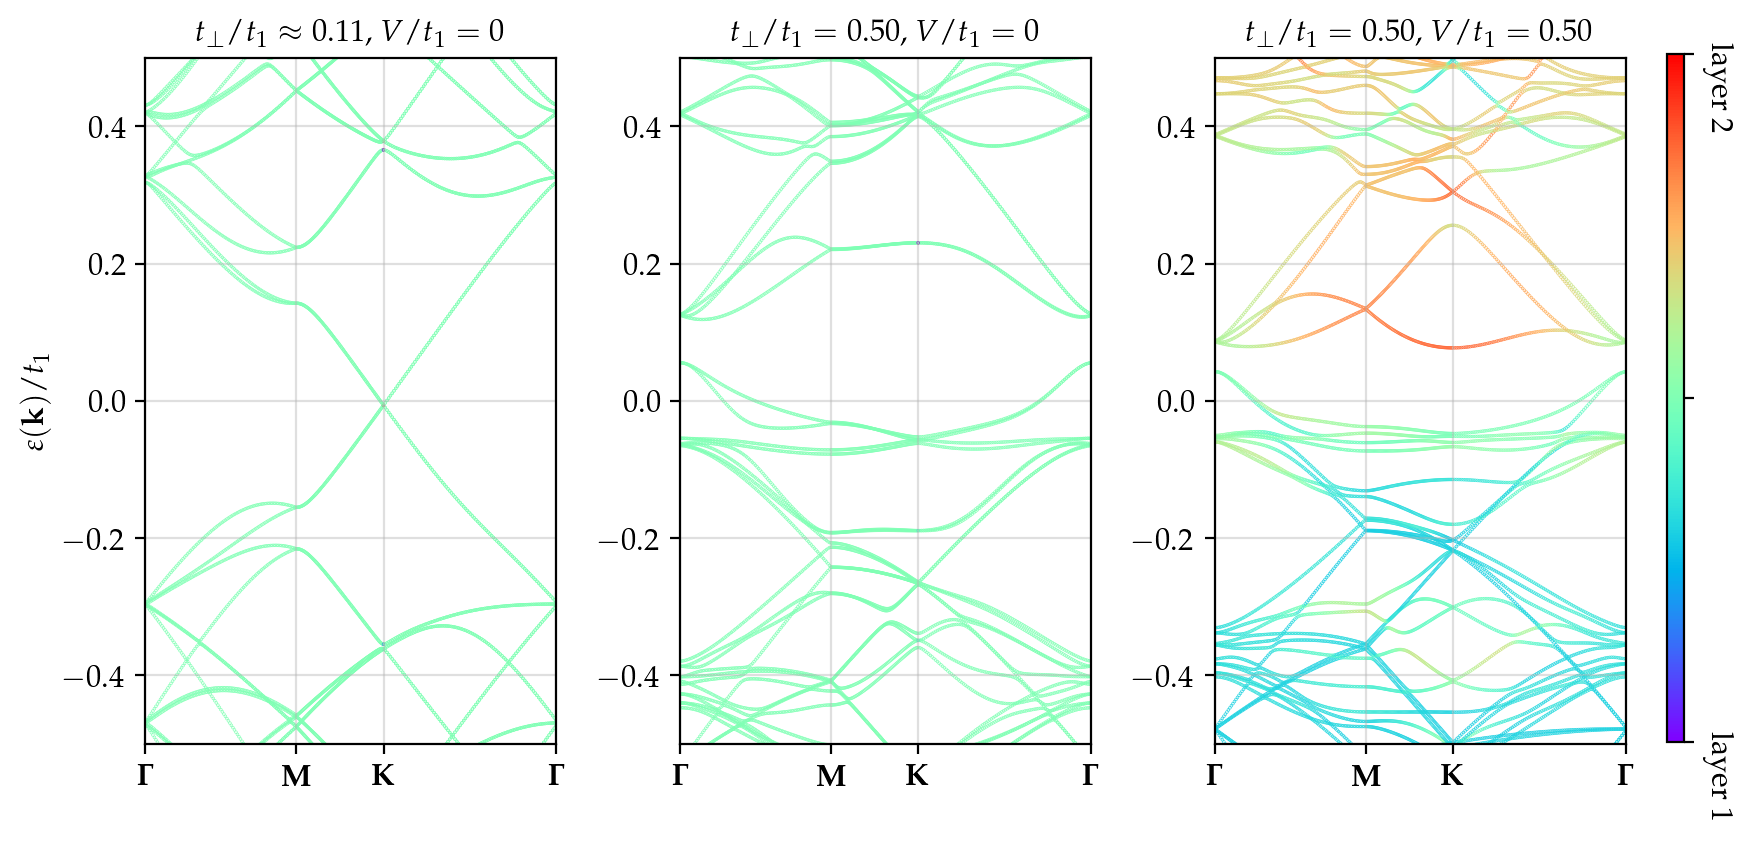

In [36]:
height=4.20
ratio=2.0
ymax=0.5

gridspec = {'width_ratios': [1, 1, 1, 0.08]}
fig, axes = plt.subplots(1, 3, figsize=(ratio*height,height))#, gridspec_kw=gridspec)
# plt.subplots_adjust(hspace=0.05,wspace=0.05)

ax=axes[0]
plot_bands_with_cmap(g.bands1/2.8922,g.ell,g.layer2_character1,'rainbow',ax)

ax.grid(True,alpha=0.4)
ax.set_xlim((g.ell[0],g.ell[-1]))
ax.set_xticks(g.ell[g.kticks],['$\mathbf{\Gamma}$','$\mathbf{M}$','$\mathbf{K}$','$\mathbf{\Gamma}$'])
ax.set_ylim((-ymax,ymax))
ax.set_ylabel('$\\varepsilon(\mathbf{k})/t_1$')
ax.set_title(f'$t_{{\\perp}}/t_1\\approx 0.11$, $V/t_1=0$')
# ax.set_yticks([-4,-3,-2,-1,-hop_ratio,0,hop_ratio,1,2,3,4],['-4','-3','-2','-1','','','','1','2','3','4'])

ax=axes[1]
plot_bands_with_cmap(g.bands2/2.8922,g.ell,g.layer2_character2,'rainbow',ax)

ax.grid(True,alpha=0.4)
ax.set_xlim((g.ell[0],g.ell[-1]))
ax.set_xticks(g.ell[g.kticks],['$\mathbf{\Gamma}$','$\mathbf{M}$','$\mathbf{K}$','$\mathbf{\Gamma}$'])
ax.set_ylim((-ymax,ymax))
# ax.set_ylabel('$\\varepsilon(\mathbf{k})/t_1$')
ax.set_title(f'$t_{{\\perp}}/t_1={tt:.2f}$, $V/t_1=0$')
# ax.set_yticks([-4,-3,-2,-hop_ratio,0,hop_ratio,2,3,4],['-4','-3','-2','$-t_{\\perp}/t_1$','0','$t_{\\perp}/t_1$','2','3','4'])


ax=axes[2]
plot_bands_with_cmap(g.bands3/2.8922,g.ell,g.layer2_character3,'rainbow',ax)


ax.grid(True,alpha=0.4)
ax.set_xlim((g.ell[0],g.ell[-1]))
ax.set_xticks(g.ell[g.kticks],['$\mathbf{\Gamma}$','$\mathbf{M}$','$\mathbf{K}$','$\mathbf{\Gamma}$'])
ax.set_ylim((-ymax,ymax))
# ax.set_ylabel('$\\varepsilon(\mathbf{k})/t_1$')
ax.set_title(f'$t_{{\\perp}}/t_1={tt:.2f}$, $V/t_1={VV:.2f}$')
tp_V=np.sqrt(hop_ratio**2+(V_ratio/2)**2)
# ax.set_yticks([-4,-3,-2,-tp_V,0,tp_V,2,3,4],['-4','-3','-2','$-t_{\\perp}^V/t_1$','0','$t_{\\perp}^V/t_1$','2','3','4'])

cbaxes = fig.add_axes([1, 0.1, 0.01, 0.82]) 
cbar=fig.colorbar(cm.ScalarMappable(matplotlib.colors.Normalize(vmin=0,vmax=1),cmap='rainbow'),ax=axes,cax=cbaxes)
cbar.set_ticks([0,0.5,1.0],labels=['layer 1','','layer 2'],rotation=270)

# plt.savefig('Fig23_intercoup_and_V_study_twisted.svg',bbox_inches='tight')
# plt.savefig('Fig23_intercoup_and_V_study_twisted.png',dpi=300,bbox_inches='tight')

plt.show()